**KDE Determined Adaptive Kernel Regression**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

np.random.seed(42)

x = np.sort(np.random.beta(2, 5, 200) * 10)

# True regression function
def f_true(x):
    return np.sin(x)

# Observations with noise
y = f_true(x) + 0.25 * np.random.randn(200)

In [29]:

def kde_adaptive_kernel_regression(x_train, y_train, x_eval, alpha=0.1):
    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)
    x_eval = np.asarray(x_eval)

    # KDE on training points
    kde = gaussian_kde(x_train)
    f_hat = kde(x_train)

    # Global bandwidth (Silverman's rule)
    h0 = np.std(x_train) * len(x_train) ** (-1/5)

    # KDE-determined adaptive bandwidths
    h_i = h0 * (f_hat ** (-alpha))

    #Cap extreme bandwidths
    h_min, h_max = np.percentile(h_i, [5, 80])
    h_i = np.clip(h_i, h_min, h_max)

    def gaussian(u):
        return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)

    y_pred = np.zeros_like(x_eval)

    for j, x0 in enumerate(x_eval):
        u = (x0 - x_train) / h_i
        weights = gaussian(u) / h_i
        y_pred[j] = np.sum(weights * y_train) / np.sum(weights)

    return y_pred

In [30]:
x_grid = np.linspace(min(x) - 1, max(x) + 1, 400)

y_kde_adapt = kde_adaptive_kernel_regression(
    x_train=x,
    y_train=y,
    x_eval=x_grid,
    alpha=0.5
)

y_true = f_true(x_grid)

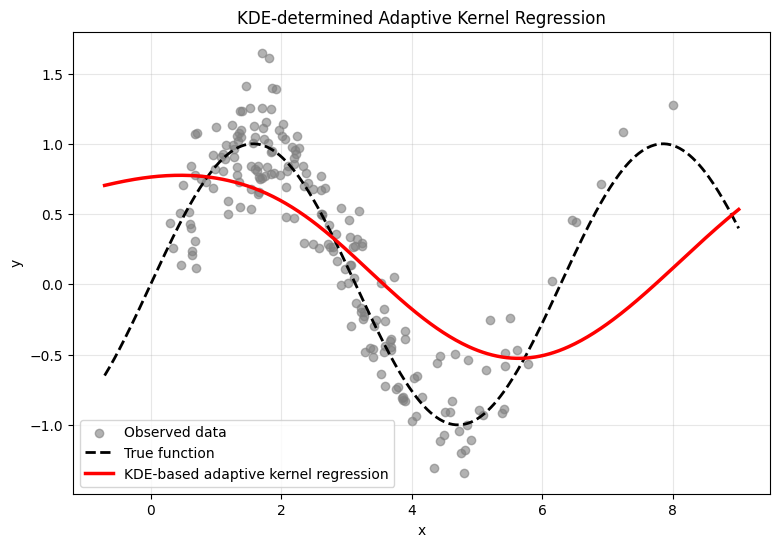

In [31]:
plt.figure(figsize=(9, 6))

# Data
plt.scatter(x, y, color="gray", alpha=0.6, label="Observed data")

# True function
plt.plot(x_grid, y_true, "k--", linewidth=2, label="True function")

# KDE-based adaptive regression
plt.plot(x_grid, y_kde_adapt, color="red", linewidth=2.5,
         label="KDE-based adaptive kernel regression")

plt.xlabel("x")
plt.ylabel("y")
plt.title("KDE-determined Adaptive Kernel Regression")
plt.legend()
plt.grid(alpha=0.3)

plt.show()